In [1]:
import numpy as np
import torch
import urllib.request as req
from PIL import Image

In [2]:
# tabular data
# url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/winequality/winequality-white.csv'
wine_path = '../data/p1ch3/winequality-white.csv'
# with req.urlopen(url) as d, open(wine_path, "wb") as opfile:
#     data = d.read()
#     opfile.write(data)
wineq_numpy = np.loadtxt(wine_path, dtype=np.float32, delimiter=';', skiprows=1)
print(wineq_numpy)
import csv
col_list = next(csv.reader(open(wine_path), delimiter=';'))
print(col_list)

[[ 7.    0.27  0.36 ...  0.45  8.8   6.  ]
 [ 6.3   0.3   0.34 ...  0.49  9.5   6.  ]
 [ 8.1   0.28  0.4  ...  0.44 10.1   6.  ]
 ...
 [ 6.5   0.24  0.19 ...  0.46  9.4   6.  ]
 [ 5.5   0.29  0.3  ...  0.38 12.8   7.  ]
 [ 6.    0.21  0.38 ...  0.32 11.8   6.  ]]
['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


In [3]:
wineq = torch.from_numpy(wineq_numpy)
print(wineq.shape, wineq.type())

torch.Size([4898, 12]) torch.FloatTensor


In [4]:
data = wineq[:, :-1]
print(data, data.shape)

tensor([[ 7.0000,  0.2700,  0.3600,  ...,  3.0000,  0.4500,  8.8000],
        [ 6.3000,  0.3000,  0.3400,  ...,  3.3000,  0.4900,  9.5000],
        [ 8.1000,  0.2800,  0.4000,  ...,  3.2600,  0.4400, 10.1000],
        ...,
        [ 6.5000,  0.2400,  0.1900,  ...,  2.9900,  0.4600,  9.4000],
        [ 5.5000,  0.2900,  0.3000,  ...,  3.3400,  0.3800, 12.8000],
        [ 6.0000,  0.2100,  0.3800,  ...,  3.2600,  0.3200, 11.8000]]) torch.Size([4898, 11])


In [5]:
target = wineq[:, -1]
target, target.shape

(tensor([6., 6., 6.,  ..., 6., 7., 6.]), torch.Size([4898]))

In [6]:
target = wineq[:, -1].long()
print(target)
target_onehot = torch.zeros(target.shape[0], 10)
target_onehot.scatter_(1, target.unsqueeze(1), 1.0)

tensor([6, 6, 6,  ..., 6, 7, 6])


tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 1., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [7]:
target_unsqueezed = target.unsqueeze(1)
print(target_unsqueezed)

tensor([[6],
        [6],
        [6],
        ...,
        [6],
        [7],
        [6]])


In [8]:
data_mean = torch.mean(data, dim=0)
print(data_mean)

tensor([6.8548e+00, 2.7824e-01, 3.3419e-01, 6.3914e+00, 4.5772e-02, 3.5308e+01,
        1.3836e+02, 9.9403e-01, 3.1883e+00, 4.8985e-01, 1.0514e+01])


In [9]:
data_var = torch.var(data, dim=0)
print(data_var)

tensor([7.1211e-01, 1.0160e-02, 1.4646e-02, 2.5726e+01, 4.7733e-04, 2.8924e+02,
        1.8061e+03, 8.9455e-06, 2.2801e-02, 1.3025e-02, 1.5144e+00])


In [10]:
data_normalized = (data - data_mean) / torch.sqrt(data_var)
print(data_normalized)

tensor([[ 1.7209e-01, -8.1764e-02,  2.1325e-01,  ..., -1.2468e+00,
         -3.4914e-01, -1.3930e+00],
        [-6.5743e-01,  2.1587e-01,  4.7991e-02,  ...,  7.3992e-01,
          1.3467e-03, -8.2418e-01],
        [ 1.4756e+00,  1.7448e-02,  5.4378e-01,  ...,  4.7502e-01,
         -4.3677e-01, -3.3662e-01],
        ...,
        [-4.2042e-01, -3.7940e-01, -1.1915e+00,  ..., -1.3131e+00,
         -2.6152e-01, -9.0544e-01],
        [-1.6054e+00,  1.1666e-01, -2.8253e-01,  ...,  1.0048e+00,
         -9.6250e-01,  1.8574e+00],
        [-1.0129e+00, -6.7703e-01,  3.7852e-01,  ...,  4.7502e-01,
         -1.4882e+00,  1.0448e+00]])


In [11]:
bad_indexes = torch.le(target, 3)
print(bad_indexes.shape, bad_indexes.dtype, bad_indexes.sum())

torch.Size([4898]) torch.bool tensor(20)


In [12]:
bad_data = data[bad_indexes]
print(bad_data.shape)

torch.Size([20, 11])


In [13]:
bad_data = data[torch.le(target, 3)]
mid_data = data[torch.gt(target, 3) & torch.lt(target, 7)]
good_data = data[torch.ge(target, 7)]

bad_mean = torch.mean(bad_data, dim=0)
mid_mean = torch.mean(mid_data, dim=0)
good_mean = torch.mean(good_data, dim=0)

for i, args in enumerate(zip(col_list, bad_mean, mid_mean, good_mean)):
    print('{:2} {:20} {:6.2f} {:6.2f} {:6.2f}'.format(i, *args))
    

 0 fixed acidity          7.60   6.89   6.73
 1 volatile acidity       0.33   0.28   0.27
 2 citric acid            0.34   0.34   0.33
 3 residual sugar         6.39   6.71   5.26
 4 chlorides              0.05   0.05   0.04
 5 free sulfur dioxide   53.33  35.42  34.55
 6 total sulfur dioxide 170.60 141.83 125.25
 7 density                0.99   0.99   0.99
 8 pH                     3.19   3.18   3.22
 9 sulphates              0.47   0.49   0.50
10 alcohol               10.34  10.26  11.42


In [14]:
total_sulfur_threshold = 141.83
total_sulfur_data = data[:, 6]
predicted_indexes = torch.lt(total_sulfur_data, total_sulfur_threshold)
print(predicted_indexes.shape, predicted_indexes.dtype, predicted_indexes.sum())

torch.Size([4898]) torch.bool tensor(2727)


In [15]:
actual_indexes =torch.gt(target, 5)
print(actual_indexes.shape, actual_indexes.dtype, actual_indexes.sum())

torch.Size([4898]) torch.bool tensor(3258)


In [16]:
n_matches = torch.sum(actual_indexes & predicted_indexes).item()
n_predicted = torch.sum(predicted_indexes).item()
n_actual = torch.sum(actual_indexes).item()
print(n_matches, n_predicted, n_actual)
print(n_matches, n_matches/n_predicted, n_matches/n_actual)

2018 2727 3258
2018 0.74000733406674 0.6193984039287906


### TIMESERIES

In [17]:
bikes_numpy = np.loadtxt('../data/p1ch3/hour-fixed.csv', dtype=np.float32, delimiter=',', skiprows=1, converters={1: lambda x: float(x[8: 10])})
bikes = torch.from_numpy(bikes_numpy)
print(bikes)
print(bikes.shape)
print(bikes.stride())

tensor([[1.0000e+00, 1.0000e+00, 1.0000e+00,  ..., 3.0000e+00, 1.3000e+01,
         1.6000e+01],
        [2.0000e+00, 1.0000e+00, 1.0000e+00,  ..., 8.0000e+00, 3.2000e+01,
         4.0000e+01],
        [3.0000e+00, 1.0000e+00, 1.0000e+00,  ..., 5.0000e+00, 2.7000e+01,
         3.2000e+01],
        ...,
        [1.7377e+04, 3.1000e+01, 1.0000e+00,  ..., 7.0000e+00, 8.3000e+01,
         9.0000e+01],
        [1.7378e+04, 3.1000e+01, 1.0000e+00,  ..., 1.3000e+01, 4.8000e+01,
         6.1000e+01],
        [1.7379e+04, 3.1000e+01, 1.0000e+00,  ..., 1.2000e+01, 3.7000e+01,
         4.9000e+01]])
torch.Size([17520, 17])
(17, 1)


In [18]:
daily_bikes = bikes.view(-1, 24, bikes.shape[1])
daily_bikes.shape, daily_bikes.stride()

(torch.Size([730, 24, 17]), (408, 17, 1))

In [19]:
daily_bikes = daily_bikes.transpose(1, 2)
daily_bikes.shape, daily_bikes.stride()

(torch.Size([730, 17, 24]), (408, 1, 17))

In [20]:
first_day = bikes[:24].long()
weather_onehot = torch.zeros(first_day.shape[0], 4)
print(first_day[:, 9])

tensor([1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2])


In [21]:
weather_onehot.scatter_(
    dim=1,
    index=first_day[:, 9].unsqueeze(1) - 1,
    value=1.0
)
print(bikes.shape, weather_onehot.shape)
torch.cat((bikes[:24], weather_onehot),1)[:1]

torch.Size([17520, 17]) torch.Size([24, 4])


tensor([[ 1.0000,  1.0000,  1.0000,  0.0000,  1.0000,  0.0000,  0.0000,  6.0000,
          0.0000,  1.0000,  0.2400,  0.2879,  0.8100,  0.0000,  3.0000, 13.0000,
         16.0000,  1.0000,  0.0000,  0.0000,  0.0000]])

In [22]:
daily_weather_onehot = torch.zeros(daily_bikes.shape[0], 4, daily_bikes.shape[2])
print(daily_bikes.shape[2])
print(daily_weather_onehot.shape)

24
torch.Size([730, 4, 24])


In [23]:
daily_weather_onehot.scatter_(1, daily_bikes[:, 9, : ].long().unsqueeze(1)-1, 1.0)
daily_weather_onehot.shape

torch.Size([730, 4, 24])

In [24]:
daily_bikes = torch.cat((daily_bikes, daily_weather_onehot), dim=1)

In [25]:
temp = daily_bikes[:, 10, :]
temp_min = torch.min(temp)
temp_max = torch.max(temp)
daily_bikes[:, 10, :] = (daily_bikes[:, 10, :]-temp_min)/(temp_max-temp_min)
print(daily_bikes[:, 10, :])

tensor([[0.2245, 0.2041, 0.2041,  ..., 0.3878, 0.3878, 0.4490],
        [0.4490, 0.4286, 0.4082,  ..., 0.2449, 0.2245, 0.2041],
        [0.2041, 0.1837, 0.1837,  ..., 0.1633, 0.1224, 0.1633],
        ...,
        [0.2245, 0.2245, 0.2245,  ..., 0.2653, 0.2449, 0.2449],
        [0.2449, 0.2449, 0.2449,  ..., 0.1837, 0.1837, 0.1837],
        [0.1633, 0.1633, 0.1429,  ..., 0.2449, 0.2449, 0.2449]])


In [26]:
temp = daily_bikes[:, 10, :]
daily_bikes[:, 10, :] = (daily_bikes[:, 10, :] - torch.mean(temp))/torch.std(temp)
print(daily_bikes[:, 10, :])

tensor([[-1.3213, -1.4249, -1.4249,  ..., -0.4932, -0.4932, -0.1827],
        [-0.1827, -0.2862, -0.3897,  ..., -1.2178, -1.3213, -1.4249],
        [-1.4249, -1.5284, -1.5284,  ..., -1.6319, -1.8389, -1.6319],
        ...,
        [-1.3213, -1.3213, -1.3213,  ..., -1.1143, -1.2178, -1.2178],
        [-1.2178, -1.2178, -1.2178,  ..., -1.5284, -1.5284, -1.5284],
        [-1.6319, -1.6319, -1.7354,  ..., -1.2178, -1.2178, -1.2178]])


### Text

In [27]:
with open('../data/p1ch3/1342-0.txt', encoding='utf8') as f:
    text = f.read()
lines = text.split('\n')
line = lines[200]
print(line)

“Impossible, Mr. Bennet, impossible, when I am not acquainted with him


In [28]:
letter_tensor = torch.zeros(len(line), 128)
print(letter_tensor.shape)

for i, letter in enumerate(line.lower().strip()):
    letter_index = ord(letter) if ord(letter) < 128 else 0
    letter_tensor[i][letter_index]=  1

torch.Size([70, 128])


In [29]:
def clean_words(input_str):
    punctuation = '.,;:"!?”“_-'
    word_list = input_str.lower().replace('\n', ' ').split()
    word_list = [word.strip(punctuation) for word in word_list]
    return word_list

words_in_line = clean_words(line)
print(words_in_line)

word_list = sorted(set(clean_words(text)))
word2index_dict = {word: i for (i, word) in enumerate(word_list)}
print(len(word2index_dict), word2index_dict['impossible'])
print(word2index_dict)

['impossible', 'mr', 'bennet', 'impossible', 'when', 'i', 'am', 'not', 'acquainted', 'with', 'him']
7261 3394
{'': 0, '#1342]': 1, '$5,000)': 2, "'_she": 3, "'after": 4, "'ah": 5, "'as-is'": 6, "'bingley": 7, "'had": 8, "'having": 9, "'i": 10, "'keep": 11, "'lady": 12, "'lately": 13, "'lydia": 14, "'mr": 15, "'my": 16, "'oh": 17, "'s": 18, "'this": 19, "'tis": 20, "'violently": 21, "'yes,'": 22, "'you": 23, '($1': 24, '(801)': 25, '(a)': 26, '(an': 27, '(and': 28, '(any': 29, '(available': 30, '(b)': 31, '(by': 32, '(c)': 33, '(comparatively': 34, '(does': 35, '(for': 36, '(glancing': 37, '(if': 38, '(lady': 39, '(like': 40, '(most': 41, '(my': 42, '(or': 43, '(trademark/copyright)': 44, '(unasked': 45, '(what': 46, '(who': 47, '(www.gutenberg.org)': 48, '(“the': 49, '*': 50, '***': 51, '*****': 52, '1': 53, '1.a': 54, '1.b': 55, '1.c': 56, '1.d': 57, '1.e': 58, '1.e.1': 59, '1.e.2': 60, '1.e.3': 61, '1.e.4': 62, '1.e.5': 63, '1.e.6': 64, '1.e.7': 65, '1.e.8': 66, '1.e.9': 67, '1.f': 6

In [30]:
# One hot encoding
word_tensor = torch.zeros(len(words_in_line), len(word2index_dict))
for i, word in enumerate(words_in_line):
    word_index = word2index_dict[word]
    word_tensor[i][word_index] = 1  
    print('{:2} {:4} {}'.format(i, word_index, word))
    
print(word_tensor.shape)

 0 3394 impossible
 1 4305 mr
 2  813 bennet
 3 3394 impossible
 4 7078 when
 5 3315 i
 6  415 am
 7 4436 not
 8  239 acquainted
 9 7148 with
10 3215 him
torch.Size([11, 7261])


### Images

In [31]:
import imageio
image_arr = imageio.imread('../data/p1ch3/bobby.jpg')
print(image_arr.shape)

(720, 1280, 3)


In [32]:
img = torch.from_numpy(image_arr)
print(img.shape)
out = torch.transpose(img, 0, 2)
print(out.shape)

torch.Size([720, 1280, 3])
torch.Size([3, 1280, 720])


In [33]:
import os
batch_size = 100
batch = torch.zeros(3, 3, 256, 256, dtype=torch.uint8)
data_dir = '../data/p1ch3/image-cats/'
filenames = [name for name in os.listdir(data_dir) if os.path.splitext(name)=='.png']
for i, filename in enumerate(filenames):
    img_arr = imageio.imread(filename)
    batch[i] = torch.transpose(torch.from_numpy(img_arr), 0, 2)
    

In [34]:
batch = batch.float()

In [35]:
batch /= 255.0

In [36]:
n_channels = batch.shape[1]
for c in range(n_channels):
    mean = torch.mean(batch[:, c])
    std = torch.std(batch[:, c])
    batch[:, c] = (batch[:, c] - mean) / std
    
    

### Volumetric Data

In [38]:
import imageio

dir_path = '../dlwpt-code/data/p1ch4/volumetric-dicom/2-LUNG 3.0  B70f-04083'
vol_arr = imageio.volread(dir_path, 'DICOM')
print(vol_arr.shape)

Reading DICOM (examining files): 1/99 files (1.0%)99/99 files (100.0%)
  Found 1 correct series.
Reading DICOM (loading data): 99/99  (100.0%)
(99, 512, 512)


In [39]:
vol = torch.from_numpy(vol_arr).float()
vol = torch.transpose(vol, 0, 2)
vol = torch.unsqueeze(vol, 0)
print(vol.shape)

torch.Size([1, 512, 512, 99])


In [1]:
# Create a ResNet instance

import torch
import torch.nn as nn

class ResNetBlock(nn.Module): # <1>

    def __init__(self, dim):
        super(ResNetBlock, self).__init__()
        self.conv_block = self.build_conv_block(dim)

    def build_conv_block(self, dim):
        conv_block = []

        conv_block += [nn.ReflectionPad2d(1)]

        conv_block += [nn.Conv2d(dim, dim, kernel_size=3, padding=0, bias=True),
                       nn.InstanceNorm2d(dim),
                       nn.ReLU(True)]

        conv_block += [nn.ReflectionPad2d(1)]

        conv_block += [nn.Conv2d(dim, dim, kernel_size=3, padding=0, bias=True),
                       nn.InstanceNorm2d(dim)]

        return nn.Sequential(*conv_block)

    def forward(self, x):
        out = x + self.conv_block(x) # <2>
        return out


class ResNetGenerator(nn.Module):

    def __init__(self, input_nc=3, output_nc=3, ngf=64, n_blocks=9): # <3>

        assert(n_blocks >= 0)
        super(ResNetGenerator, self).__init__()

        self.input_nc = input_nc
        self.output_nc = output_nc
        self.ngf = ngf

        model = [nn.ReflectionPad2d(3),
                 nn.Conv2d(input_nc, ngf, kernel_size=7, padding=0, bias=True),
                 nn.InstanceNorm2d(ngf),
                 nn.ReLU(True)]

        n_downsampling = 2
        for i in range(n_downsampling):
            mult = 2**i
            model += [nn.Conv2d(ngf * mult, ngf * mult * 2, kernel_size=3,
                                stride=2, padding=1, bias=True),
                      nn.InstanceNorm2d(ngf * mult * 2),
                      nn.ReLU(True)]

        mult = 2**n_downsampling
        for i in range(n_blocks):
            model += [ResNetBlock(ngf * mult)]

        for i in range(n_downsampling):
            mult = 2**(n_downsampling - i)
            model += [nn.ConvTranspose2d(ngf * mult, int(ngf * mult / 2),
                                         kernel_size=3, stride=2,
                                         padding=1, output_padding=1,
                                         bias=True),
                      nn.InstanceNorm2d(int(ngf * mult / 2)),
                      nn.ReLU(True)]

        model += [nn.ReflectionPad2d(3)]
        model += [nn.Conv2d(ngf, output_nc, kernel_size=7, padding=0)]
        model += [nn.Tanh()]

        self.model = nn.Sequential(*model)

    def forward(self, input): # <3>
        return self.model(input)

In [2]:
netG = ResNetGenerator()

In [4]:
model_path = '../data/p1ch2/horse2zebra_0.4.0.pth'
model_data = torch.load(model_path)
netG.load_state_dict(model_data)

<All keys matched successfully>

In [5]:
netG.eval()

ResNetGenerator(
  (model): Sequential(
    (0): ReflectionPad2d((3, 3, 3, 3))
    (1): Conv2d(3, 64, kernel_size=(7, 7), stride=(1, 1))
    (2): InstanceNorm2d(64, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (3): ReLU(inplace=True)
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (5): InstanceNorm2d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (8): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (9): ReLU(inplace=True)
    (10): ResNetBlock(
      (conv_block): Sequential(
        (0): ReflectionPad2d((1, 1, 1, 1))
        (1): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1))
        (2): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
        (3): ReLU(inplace=True)
        (4): ReflectionPad2d((1, 1, 1, 1))
     

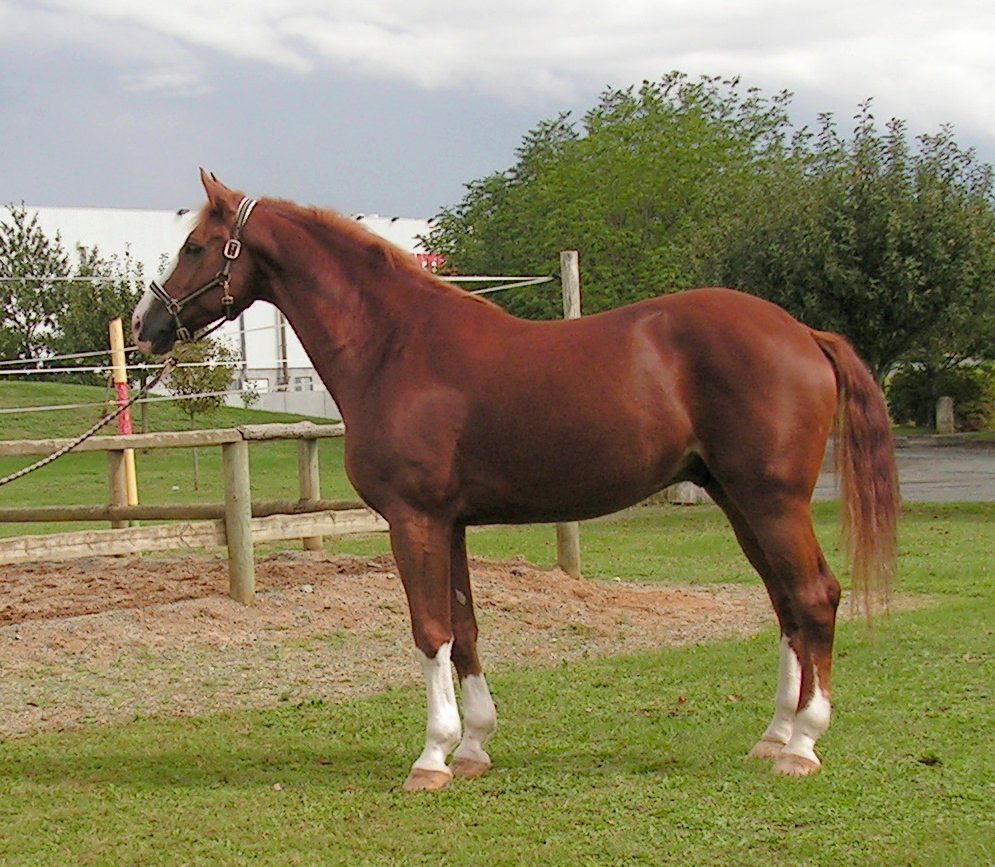

In [6]:
from PIL import Image
from torchvision import transforms

preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.ToTensor()
])

img = Image.open("../data/p1ch2/horse.jpg")
img

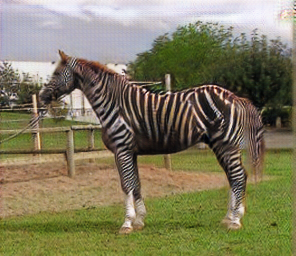

In [9]:
img_t = preprocess(img)
batch_t = torch.unsqueeze(img_t, 0)
batch_out = netG(batch_t)
out_t = (batch_out.data.squeeze()+1.0)/2.0
out_image = transforms.ToPILImage()(out_t)
out_image.save('../data/p1ch2/zebra.jpg')
out_image

### [A pretrained network that describes scenes](https://github.com/deep-learning-with-pytorch/ImageCaptioning.pytorch)

![Captioning_net](../resources/captioning_net.jpg)

### Using torchhub


In [10]:
import torch
from torch import hub
resnet18_model = hub.load('pytorch/vision:master', 'resnet18', pretrained=True)


Downloading: "https://github.com/pytorch/vision/archive/master.zip" to /home/dyson.global.corp/alydakis/.cache/torch/hub/master.zip


ModuleNotFoundError: No module named 'torchvision.models.mobilenetv2'